<a href="https://colab.research.google.com/github/tambeyash/kaggle_galaxy_zoo/blob/master/galaxy_classification(testing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\Users\dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [0]:
model = keras.models.load_model("galaxy_classification.h5")

In [0]:
train = pd.read_csv('training_solutions_rev1.csv')
train.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [0]:
train.columns

Index(['GalaxyID', 'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2',
       'Class3.1', 'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2',
       'Class5.3', 'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2',
       'Class7.3', 'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5',
       'Class8.6', 'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')

In [0]:
classes = np.array(train.columns[2:])

In [0]:
classes

array(['Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1',
       'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2',
       'Class5.3', 'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1',
       'Class7.2', 'Class7.3', 'Class8.1', 'Class8.2', 'Class8.3',
       'Class8.4', 'Class8.5', 'Class8.6', 'Class8.7', 'Class9.1',
       'Class9.2', 'Class9.3', 'Class10.1', 'Class10.2', 'Class10.3',
       'Class11.1', 'Class11.2', 'Class11.3', 'Class11.4', 'Class11.5',
       'Class11.6'], dtype=object)

In [0]:
def predict(path):
   img = cv2.imread(path)
   #plt.imshow(img)
   img = img[106:318,106:318]
   classes = np.array(train.columns[2:])
   proba = model.predict(img.reshape(1,212,212,3))
   top_3 = np.argsort(proba[0])[:-4:-1]
   for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
   plt.imshow(img)

Class1.3 (0.802)
Class3.1 (0.774)
Class7.1 (0.704)


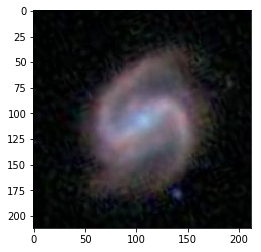

In [0]:
predict('test6/600374.jpg')

Class3.1 (0.744)
Class1.3 (0.726)
Class7.1 (0.654)


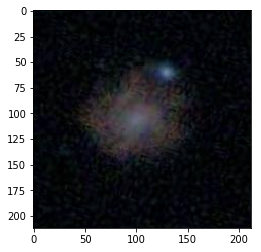

In [0]:
predict('test6/600313.jpg')

Class7.1 (0.601)
Class1.3 (0.58)
Class6.2 (0.39)


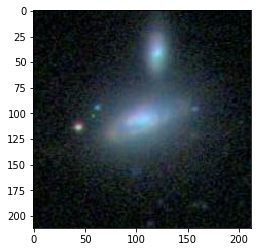

In [0]:
predict('test6/600722.jpg')